In [2]:
# модуль Python, который предоставляет общие математические и числовые операции 
import numpy as np
# библиотека scipy.special с сигмоидой expit()
import scipy.special
#библиотека для графического отображения массивов
import matplotlib.pyplot
#гарантировать размещение графики в данном блокноте, а не в отдельном окне
%matplotlib inline

# определение класса нейронной сети
class neuralNetwork:
    
    #инициализация - задание количества входных, скрытых и выходных узлов
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # задание количества узлов во входном, скрытом и выходном слое
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # Матрицы весовых коэффициентов связей wih (между входным и скрытым 
        # слоями) и who (между скрытым и выходным слоями).
        # Весовые коэффициенты связей между узлом i и узлом j следующего слоя
        # обозначены как w_i_j:
        # w11 w21
        # w12 w22 и тд.
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), 
                                      (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), 
                                      (self.onodes, self.hnodes))
        
        # коэффициент обучения
        self.lr = learningrate
        
        # использование сигмоиды в качестве функции активации
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # тренировка нейронной сети - уточнение весовых коэффициентов в процессе 
    # обработки предоставленных для обучения сети тренировочных примеров
    def train(self, inputs_list, targets_list):
        # преобразовать список входных значений в двухмерный массив
        inputs = np.array(inputs_list, ndmin = 2).T
        targets = np.array(targets_list, ndmin = 2).T
        
        # расчитать входящие сигналы для скрытого слоя
        hidden_inputs = np.dot(self.wih, inputs)
        # расчитать исходящие сигналы для скрытыго слоя
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # расчитать входящие сигналы для выходного слоя
        final_inputs = np.dot(self.who, hidden_outputs)
        # расчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        
        # ошибки выходного слоя = 
        # (целевое значение - фактическое значение)
        output_errors = targets - final_outputs
        # ошибки скрытого слоя - это ошибки output_errors,
        # распределенные пропорционально весовым коэффициентам связей
        # и рекомбинированные на скрытых узлах
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # обновить весовые коэффициенты для связей между
        # скрытым и выходным слоями
        self.who += self.lr * np.dot((output_errors * final_outputs *
                                     (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # обновить весовые коэффициенты для связей между
        # входным и скрытым слоями
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs *
                                     (1.0 - hidden_outputs)), np.transpose(inputs))
        pass
    
    # опрос нейронной сети - получение значений сигналов с выходных узлов 
    # после предоставления значений входящих сигналов
    def query(self, inputs_list):
        # преобразовать список входных значений 
        # в двумерный массив
        inputs = np.array(inputs_list, ndmin = 2).T
        
        # рассчитать входящие сигналы для скрытого слоя
        hidden_inputs = np.dot(self.wih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # рассчитать входящие сигналы для выходного слоя
        final_inputs = np.dot(self.who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs


In [3]:
# количество входных, скрытых и выходных узлов

#Число представляет собой количество пикселей, из которых состоит изображение цифры
input_nodes = 784
#Число не больше 784, так как сеть должна находить во входных значениях такие шаблоны,
#которые можно выразить в более короткой форме, чем сами эти значения.
hidden_nodes = 175
#Выходной слой должен обеспечивать вывод 10 маркеров, значит, должен иметь 10 узлов.
output_nodes = 10

# коэффициент обучения равен 0,3
learning_rate = 0.1

# создание экземпляра нейронной сети
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

#ТРЕНИРОВКА НЕЙРОННОЙ СЕТИ

#загрузить в список тестовый набор данных CSV-файла набора MNIST
training_data_file = open('mnist_train.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

#переменная указывает, сколько раз тренировочный набор данных
#используется для тренировки сети
epochs = 8

for e in range(epochs):
    #перебрать все записи в тренировочном наборе данных
    for record in training_data_list:
        #получить список значений, используя символы запятой в качестве разделителей
        all_values = record.split(',')
        #масштабировать и сместить входные значения
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        #дополнительное масштабирование выходных значений - создание целевых выходных значений -
        #все равны 0.01, за исключением желаемого маркерного значения 0.99
        targets = np.zeros(output_nodes) + 0.01
    
        #all_values[0] - целевое маркерное значение для данной записи
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

#ТЕСТИРОВАНИЕ НЕЙРОННОЙ СЕТИ

#загрузить список в тестовый набор данных CSV-файла набора MNIST
test_data_file = open('mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

#журнал оценок работы сети, первоначально пустой
scorecard = []

for record in test_data_list:
    #получить список значений из записи, используя символы запятой в качестве разделителей
    all_values = record.split(',')
    #правильный ответ - первое значение
    correct_label = int(all_values[0])
    #---print(correct_label, 'истинный маркер')
    #масштабировать и сместить входные значения
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    #опрос сети
    outputs = n.query(inputs)
    # Наибольшее из значений входных узлов рассматривается сетью в качестве правильного ответа
    #=> индекс наибольшего значения является маркерным значением 
    label = np.argmax(outputs)
    #---print(label, 'ответ сети')
    #присоеденить оценку ответа сети к концу списка
    if (label == correct_label):
        #в случае правильного ответа сети присоеденить
        #к списку значение 1
        scorecard.append(1)
    else:
        #в случае неправильного ответа сети присоеденить
        #к списку значение 0
        scorecard.append(0)

#рассчитать показатель эффективности в виде
#доли правильных ответов
scorecard_array = np.asfarray(scorecard)
print('Эффективность = ', scorecard_array.sum() / scorecard_array.size)

Эффективность =  0.974


<b>Тестирование нейронной сети</b>

In [4]:
#получить первую тестовую запись
all_values = test_data_list[0].split(',')
#вывести маркер
print(all_values[0])

7


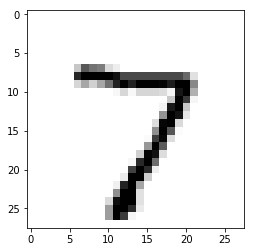

In [5]:
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap = 'Greys',
                       interpolation = 'None')

In [6]:
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.02204873],
       [0.0225559 ],
       [0.03296818],
       [0.00385288],
       [0.00344545],
       [0.00287547],
       [0.00523247],
       [0.98491887],
       [0.00497164],
       [0.0035654 ]])